In [104]:
import json
import os

import numpy as np
from itertools import combinations
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

In [1]:
import scipy

ModuleNotFoundError: No module named 'scipy'

In [4]:
import torchtext

In [5]:
torchtext.__version__

'0.12.0'

In [2]:
PATH_TO_DATASET = "/my-docker-container/codwoe/data/train-data_all"

In [3]:
os.listdir(PATH_TO_DATASET)

['en.dev.json',
 'en.train.json',
 'es.dev.json',
 'es.train.json',
 'fr.dev.json',
 'fr.train.json',
 'it.dev.json',
 'it.train.json',
 'ru.dev.json',
 'ru.train.json']

In [4]:
languages = []
dataset_lengths = dict()
for file_name in os.listdir(PATH_TO_DATASET):
    w = [PATH_TO_DATASET, file_name]
    print('/'.join(w))
    
    #изучаем сколько слов в каждом из файлов
    with open('/'.join(w), "r") as file_handler:
        dataset = json.load(file_handler)
        dataset_lengths[file_name] = len(dataset)
        
    #собираем все языки в список
    languages.append(file_name.split('.')[0])


/my-docker-container/codwoe/data/train-data_all/en.dev.json
/my-docker-container/codwoe/data/train-data_all/en.train.json
/my-docker-container/codwoe/data/train-data_all/es.dev.json
/my-docker-container/codwoe/data/train-data_all/es.train.json
/my-docker-container/codwoe/data/train-data_all/fr.dev.json
/my-docker-container/codwoe/data/train-data_all/fr.train.json
/my-docker-container/codwoe/data/train-data_all/it.dev.json
/my-docker-container/codwoe/data/train-data_all/it.train.json
/my-docker-container/codwoe/data/train-data_all/ru.dev.json
/my-docker-container/codwoe/data/train-data_all/ru.train.json


In [5]:
print(set(languages))

{'fr', 'en', 'es', 'it', 'ru'}


In [6]:
print(dataset_lengths)

{'en.dev.json': 6375, 'en.train.json': 43608, 'es.dev.json': 6375, 'es.train.json': 43608, 'fr.dev.json': 6375, 'fr.train.json': 43608, 'it.dev.json': 6375, 'it.train.json': 43608, 'ru.dev.json': 6375, 'ru.train.json': 43608}


In [7]:
test_element = dataset[0]

In [8]:
test_element.keys()

dict_keys(['id', 'gloss', 'sgns', 'char', 'electra'])

In [9]:
len(test_element["sgns"])

256

In [10]:
len(test_element["electra"])

256

In [11]:
len(test_element["char"])

256

Размерность всех эмбеддингов одинаковая - равна 256  
Каждый из 5 языков имеет 43608 слов в train и 6375 в dev  

In [2]:
PATH_ru_train = "/my-docker-container/codwoe/data/train-data_all/ru.train.json"

In [3]:
with open(PATH_ru_train, "r") as file_handler:
        dataset = json.load(file_handler)

In [4]:
print(dataset[5]['gloss'])

действие по значению гл . эмигрировать ; переселение из своего отечества в другую страну


In [15]:
for i in range(5, 70, 5):
    print()
    g = dataset[i]['gloss']
    index = dataset[i]['id']
    
    print('{}: {}'.format(index, g))


ru.train.6: действие по значению гл . эмигрировать ; переселение из своего отечества в другую страну

ru.train.11: неперех. , разг . катясь , перемещаться откуда-либо ; выезжать

ru.train.16: перен . интенсивно , активно

ru.train.21: результат такого действия

ru.train.26: женск . к торговец

ru.train.31: воен . увеличение длины формирования при его движении

ru.train.36: связанный с каменным углем или с его добычей

ru.train.41: свойственный аэродрому , характерный для него

ru.train.46: устар . наперебой

ru.train.51: действие по значению гл . опустошать , опустошить

ru.train.56: рег . ( южн.-русск . ) удобрение парового поля при помощи оставления на ночь скота ( обычно овец ) на нём

ru.train.61: комп . часть операционной системы , отвечающая за загрузку исполняемых файлов и запуск соответствующих новых процессов

ru.train.66: устар. , рег . тина или ряска на воде


In [19]:
type(dataset[i])

dict

In [10]:
print(dataset[i]['id'])

ru.train.66


In [43]:
def gloss_to_id_mapping(dataset, include_none=True):
    """      
    
    Функция, которая для каждого уникального определения
    данного датасета соотносит все id слов.
    
    dataset - список словарей
    include_none - включает id значений которых None, если True
    
    Возвращает словарь, ключи которого является определением,
    а значение - списком id слова
 
    """
    
    gloss_to_id_dict = dict()

    for d in dataset:
        g1 = d['gloss']
        index = d['id']
        
        if index is None and not include_none:
            continue 

        if g1 in list(gloss_to_id_dict.keys()):
            gloss_to_id_dict[g1].append(index)
        else:
            gloss_to_id_dict[g1] = [index]
            
            
    return gloss_to_id_dict

In [44]:
gloss_to_id_with_None =  gloss_to_id_mapping(dataset, include_none=True)
gloss_to_id_without_None = gloss_to_id_mapping(dataset, include_none=False)

In [33]:
#Подсчет нанов
n = 0
for f in dataset:
    if f['id'] is None:
        n += 1
        

In [34]:
n

19462

In [45]:
#Подсчет дубликатов с учетом None
dublicate_count_with_None = 0
for f in gloss_to_id_with_None:
    if len(gloss_to_id_with_None[f]) >= 2:
        dublicate_count_with_None += 1
        
#Подсчет дубликатов без учетов None
dublicate_count_without_None = 0

for f in gloss_to_id_without_None:
    if len(gloss_to_id_without_None[f]) >= 2:
        dublicate_count_without_None += 1
        
        

In [46]:
dublicate_count_with_None

8660

In [47]:
dublicate_count_without_None

3563

In [48]:
#Процентное соотношение
dublicate_count_with_None/len(gloss_to_id_with_None)

0.28199283620970367

In [49]:
#Процентное соотношение
dublicate_count_without_None/len(gloss_to_id_without_None)

0.18367872976595526

In [53]:
dublicates_id = []
for i in gloss_to_id_without_None:
    if len(gloss_to_id_without_None[i]) > 1:
        dublicates_id.append(gloss_to_id_without_None[i])
        if len(dublicates_id) > 15:
            break
        


In [54]:
dublicates_id

[['ru.train.1', 'ru.train.19649'],
 ['ru.train.2', 'ru.train.10054'],
 ['ru.train.7', 'ru.train.22639'],
 ['ru.train.14', 'ru.train.18716', 'ru.train.19229'],
 ['ru.train.15', 'ru.train.5062'],
 ['ru.train.19', 'ru.train.21918', 'ru.train.23737'],
 ['ru.train.21',
  'ru.train.47',
  'ru.train.673',
  'ru.train.2601',
  'ru.train.3748',
  'ru.train.5091',
  'ru.train.9517',
  'ru.train.14298',
  'ru.train.15485',
  'ru.train.16721',
  'ru.train.18186',
  'ru.train.20261',
  'ru.train.21906',
  'ru.train.22360'],
 ['ru.train.24', 'ru.train.8919'],
 ['ru.train.31', 'ru.train.6541'],
 ['ru.train.34', 'ru.train.15500'],
 ['ru.train.35', 'ru.train.13356'],
 ['ru.train.36', 'ru.train.20368'],
 ['ru.train.43', 'ru.train.5965'],
 ['ru.train.46', 'ru.train.7605'],
 ['ru.train.50', 'ru.train.5060', 'ru.train.13924'],
 ['ru.train.65', 'ru.train.12601', 'ru.train.23342']]

In [59]:
6 in [1, 2, 3, 4]

False

In [67]:
#Принимает на вход list id-ишников и возвращает три списка векторов
def get_vectors(ids_list):
    sgns = []
    char = []
    electra = []
    for entry in dataset:
        if entry['id'] in ids_list:
            sgns.append(np.asarray(entry['sgns']))
            char.append(np.asarray(entry['char']))
            electra.append(np.asarray(entry['electra']))
    return sgns, char, electra
            
            

In [68]:
sgns, char, electra = get_vectors(dublicates_id[0])

In [69]:
type(sgns[0])

numpy.ndarray

In [74]:
np.array_equal(sgns[0], sgns[1])

True

In [72]:
sgns[0].shape

(256,)

In [ ]:
'sgns', 'char', 'electra'

In [77]:
#Принимает на вход list векторов и попарно сравнивает все
def vectors_compare(vector_list):
    for pair in combinations(vector_list, 2):
        if not np.array_equal(pair[0], pair[1]):
            return False
    return True

In [79]:
vectors_compare(sgns)

True

In [83]:
#Сравнение вектором 16 дубликатов
compare_results = []
for index in dublicates_id:
    sgns, char, electra = get_vectors(index)
    result_sgns = vectors_compare(sgns)
    result_char = vectors_compare(char) 
    result_electra = vectors_compare(electra)
    compare_results.append({'sgns': result_sgns, 'char': result_char, 'electra': result_electra})
    

In [85]:
len(dublicates_id)

16

In [84]:
compare_results

[{'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': False, 'char': False, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False},
 {'sgns': True, 'char': True, 'electra': False}]

In [99]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenizer.tokenize('So basically tokenizing involves splitting sentences and words from the body of the text. import the existing word and sentence tokenizing. libraries. from nltk.tokenize import sent_tokenize, word_tokenize. text = Natural language processing (NLP) is a field  + ')



['So',
 'basically',
 'tokenizing',
 'involves',
 'splitting',
 'sentences',
 'and',
 'words',
 'from',
 'the',
 'body',
 'of',
 'the',
 'text',
 'import',
 'the',
 'existing',
 'word',
 'and',
 'sentence',
 'tokenizing',
 'libraries',
 'from',
 'nltk',
 'tokenize',
 'import',
 'sent_tokenize',
 'word_tokenize',
 'text',
 'Natural',
 'language',
 'processing',
 'NLP',
 'is',
 'a',
 'field']

In [100]:
len_token = []
for i in dataset:
    text = i['gloss']
    token = tokenizer.tokenize(text)
    
    len_token.append(len(token))
    

In [103]:
len(len_token)

43608

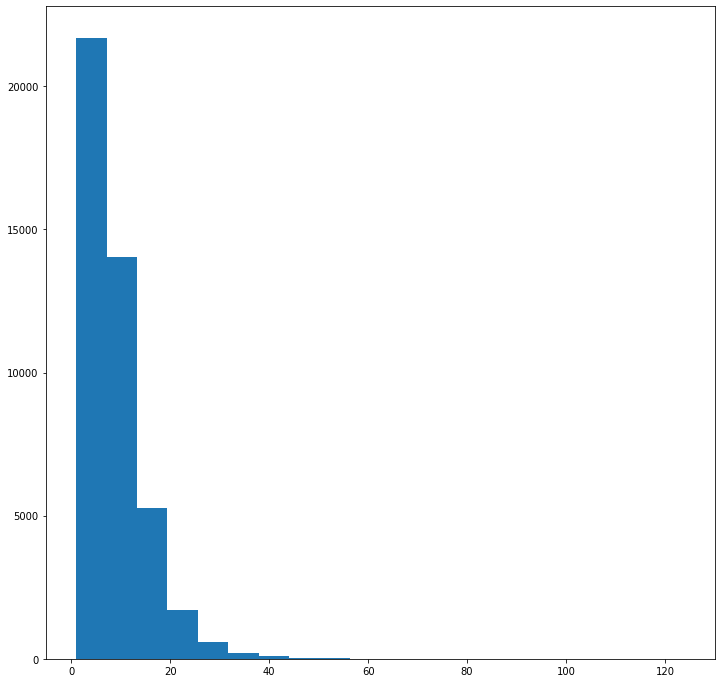

In [110]:
plt.rcParams["figure.figsize"] = (12, 12)
n, bins, patches = plt.hist(len_token, bins=20)
plt.show()

In [106]:
max(len_token)

124

In [107]:
min(len_token)

1

In [109]:
bins

array([  1. ,  13.3,  25.6,  37.9,  50.2,  62.5,  74.8,  87.1,  99.4,
       111.7, 124. ])

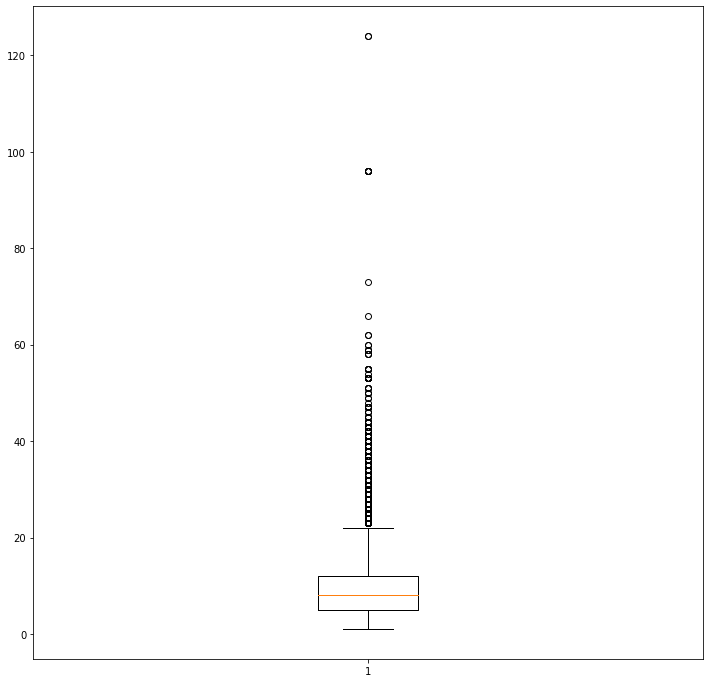

In [117]:
plt.boxplot(len_token)
plt.show()

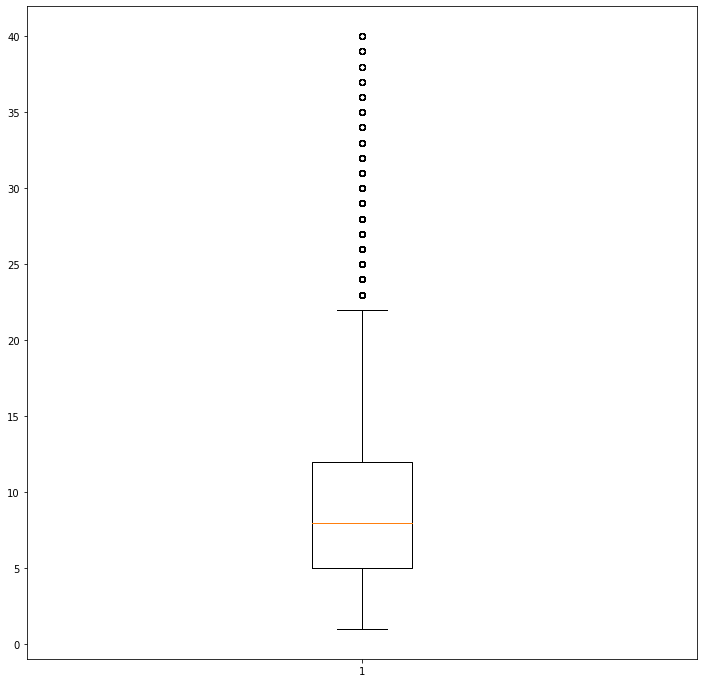

In [119]:
plt.boxplot([i for i in len_token if i <= 40])
plt.show()


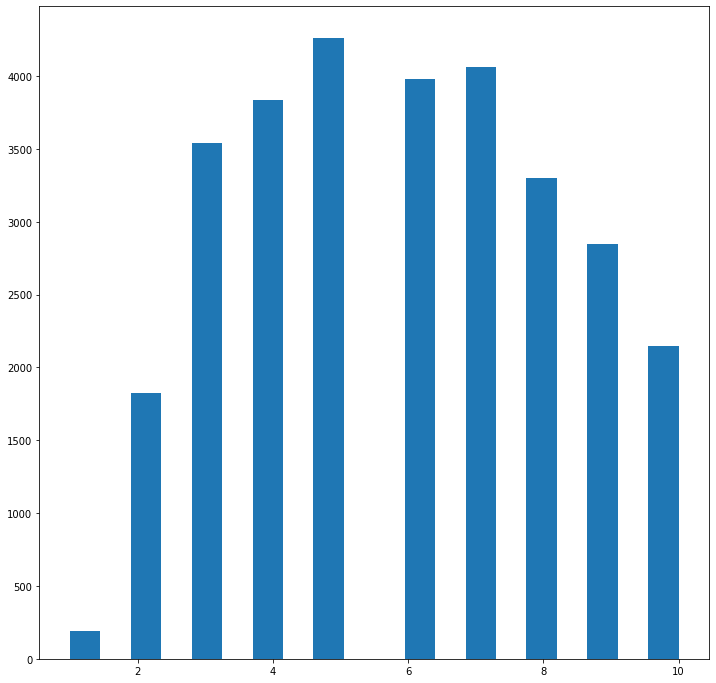

In [116]:
plt.rcParams["figure.figsize"] = (12, 12)
n, bins, patches = plt.hist(sorted(len_token)[:30000], bins=20)
plt.show()

In [ ]:
languages = []
dataset_lengths = dict()
for file_name in os.listdir(PATH_TO_DATASET):
    w = [PATH_TO_DATASET, file_name]
    print('/'.join(w))
    
    #изучаем сколько слов в каждом из файлов
    with open('/'.join(w), "r") as file_handler:
        dataset = json.load(file_handler)